# Airline Passenger Satisfaction# 

# Problem Statement

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied
(or dissatisfied) passenger? Can you predict passenger satisfaction?.We have to find out weather the 
passenger is satisfied or not based on the given features in dataset

# About Dataset

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv("train.csv",index_col = 0)
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
test = pd.read_csv("test.csv",index_col = 0)
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


# EDA

In [8]:
print("---------------Train Info -----------------")
train.info()
print('   ')
print("----------------Train Info -----------------")
test.info()

---------------Train Info -----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  


In [9]:
train.shape   # Getting shape of train data

(103904, 24)

In [10]:
test.shape    #detting shape of test dataset

(25976, 24)

In [11]:
print(pd.isnull(train).sum())


id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [12]:

# Calculating the Missing Values % contribution in Data

df_null = round(100*(train.isnull().sum())/len(train), 2)
df_null

id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.3
satisfaction                         0.0
dtype: float64

In [13]:
df_null = round(100*(test.isnull().sum())/len(test), 2)
df_null

id                                   0.00
Gender                               0.00
Customer Type                        0.00
Age                                  0.00
Type of Travel                       0.00
Class                                0.00
Flight Distance                      0.00
Inflight wifi service                0.00
Departure/Arrival time convenient    0.00
Ease of Online booking               0.00
Gate location                        0.00
Food and drink                       0.00
Online boarding                      0.00
Seat comfort                         0.00
Inflight entertainment               0.00
On-board service                     0.00
Leg room service                     0.00
Baggage handling                     0.00
Checkin service                      0.00
Inflight service                     0.00
Cleanliness                          0.00
Departure Delay in Minutes           0.00
Arrival Delay in Minutes             0.32
satisfaction                      

In [ ]:
# Here we can see that Train data has 310 missing value in Arrival Delay in Minutes
# Here we can see that Test data has 83 missing value in Arrival Delay in Minutes
# As we observe the missing values are very less ,0.3 % compare to  dataset so we will drop the missing values

In [15]:
train= train.dropna()
train.shape

(103594, 24)

In [16]:
test= test.dropna()
test.shape

(25893, 24)

In [17]:
#To check Null values again
print("---------- Train Nan Data --------------")
print(pd.isnull(train).sum())
print("---------- Test Nan Data  ---------------")
print(pd.isnull(test).sum())

---------- Train Nan Data --------------
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
----------

In [18]:
train.duplicated().sum()

0

In [19]:
print("---------- Train Nan Data --------------")
print(train.duplicated().sum())
print("---------- Test Nan Data  ---------------")
print(test.duplicated().sum())

---------- Train Nan Data --------------
0
---------- Test Nan Data  ---------------
0


In [20]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [24]:
# saprate catigorical and numerical features
catigorical_features = train.select_dtypes(include="object").columns
numerical_features = train.select_dtypes(exclude="object").columns

In [25]:
catigorical_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [26]:
numerical_features

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [22]:
numerical_features = train.select_dtypes(exclude="object").columns

In [27]:
for i in catigorical_features:
    print(i,train[i].unique())
    print()
    print("------------------------------------------")
    print()

Gender ['Male' 'Female']

------------------------------------------

Customer Type ['Loyal Customer' 'disloyal Customer']

------------------------------------------

Type of Travel ['Personal Travel' 'Business travel']

------------------------------------------

Class ['Eco Plus' 'Business' 'Eco']

------------------------------------------

satisfaction ['neutral or dissatisfied' 'satisfied']

------------------------------------------



In [28]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data Visualization

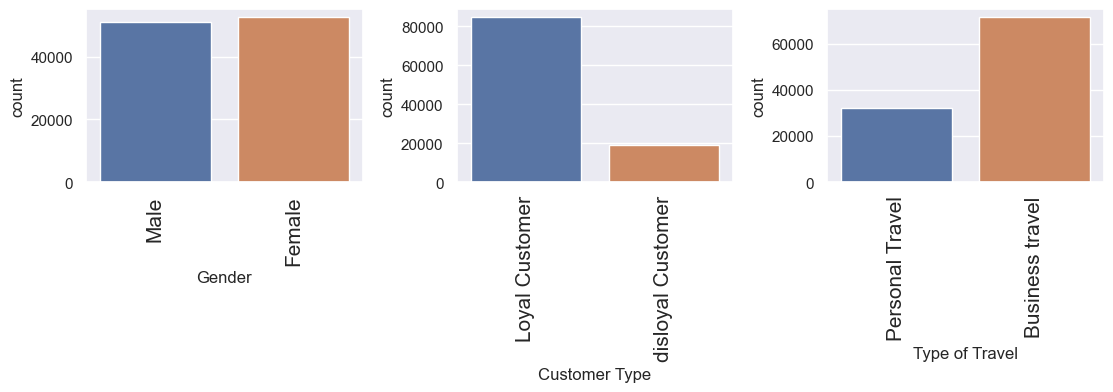

In [29]:
# For Categorical Features 

plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['Gender', 'Customer Type', 'Type of Travel']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=train[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

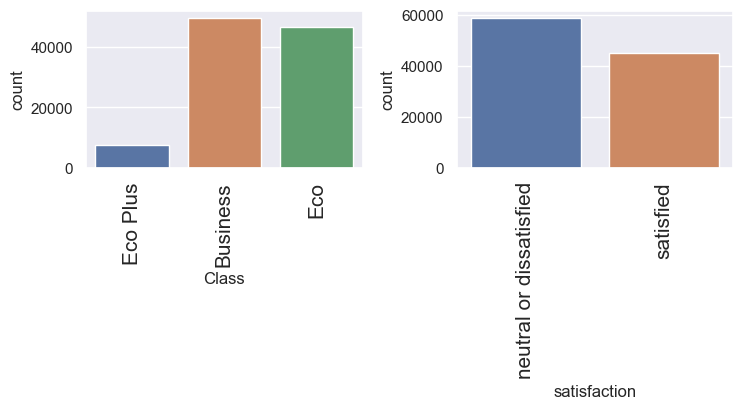

In [30]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['Class', 'satisfaction']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=train[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>],
       [<AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>],
       [<AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Inflight service'}>],
       [<AxesSubplot:title={'center':'Cleanliness'}>,
   

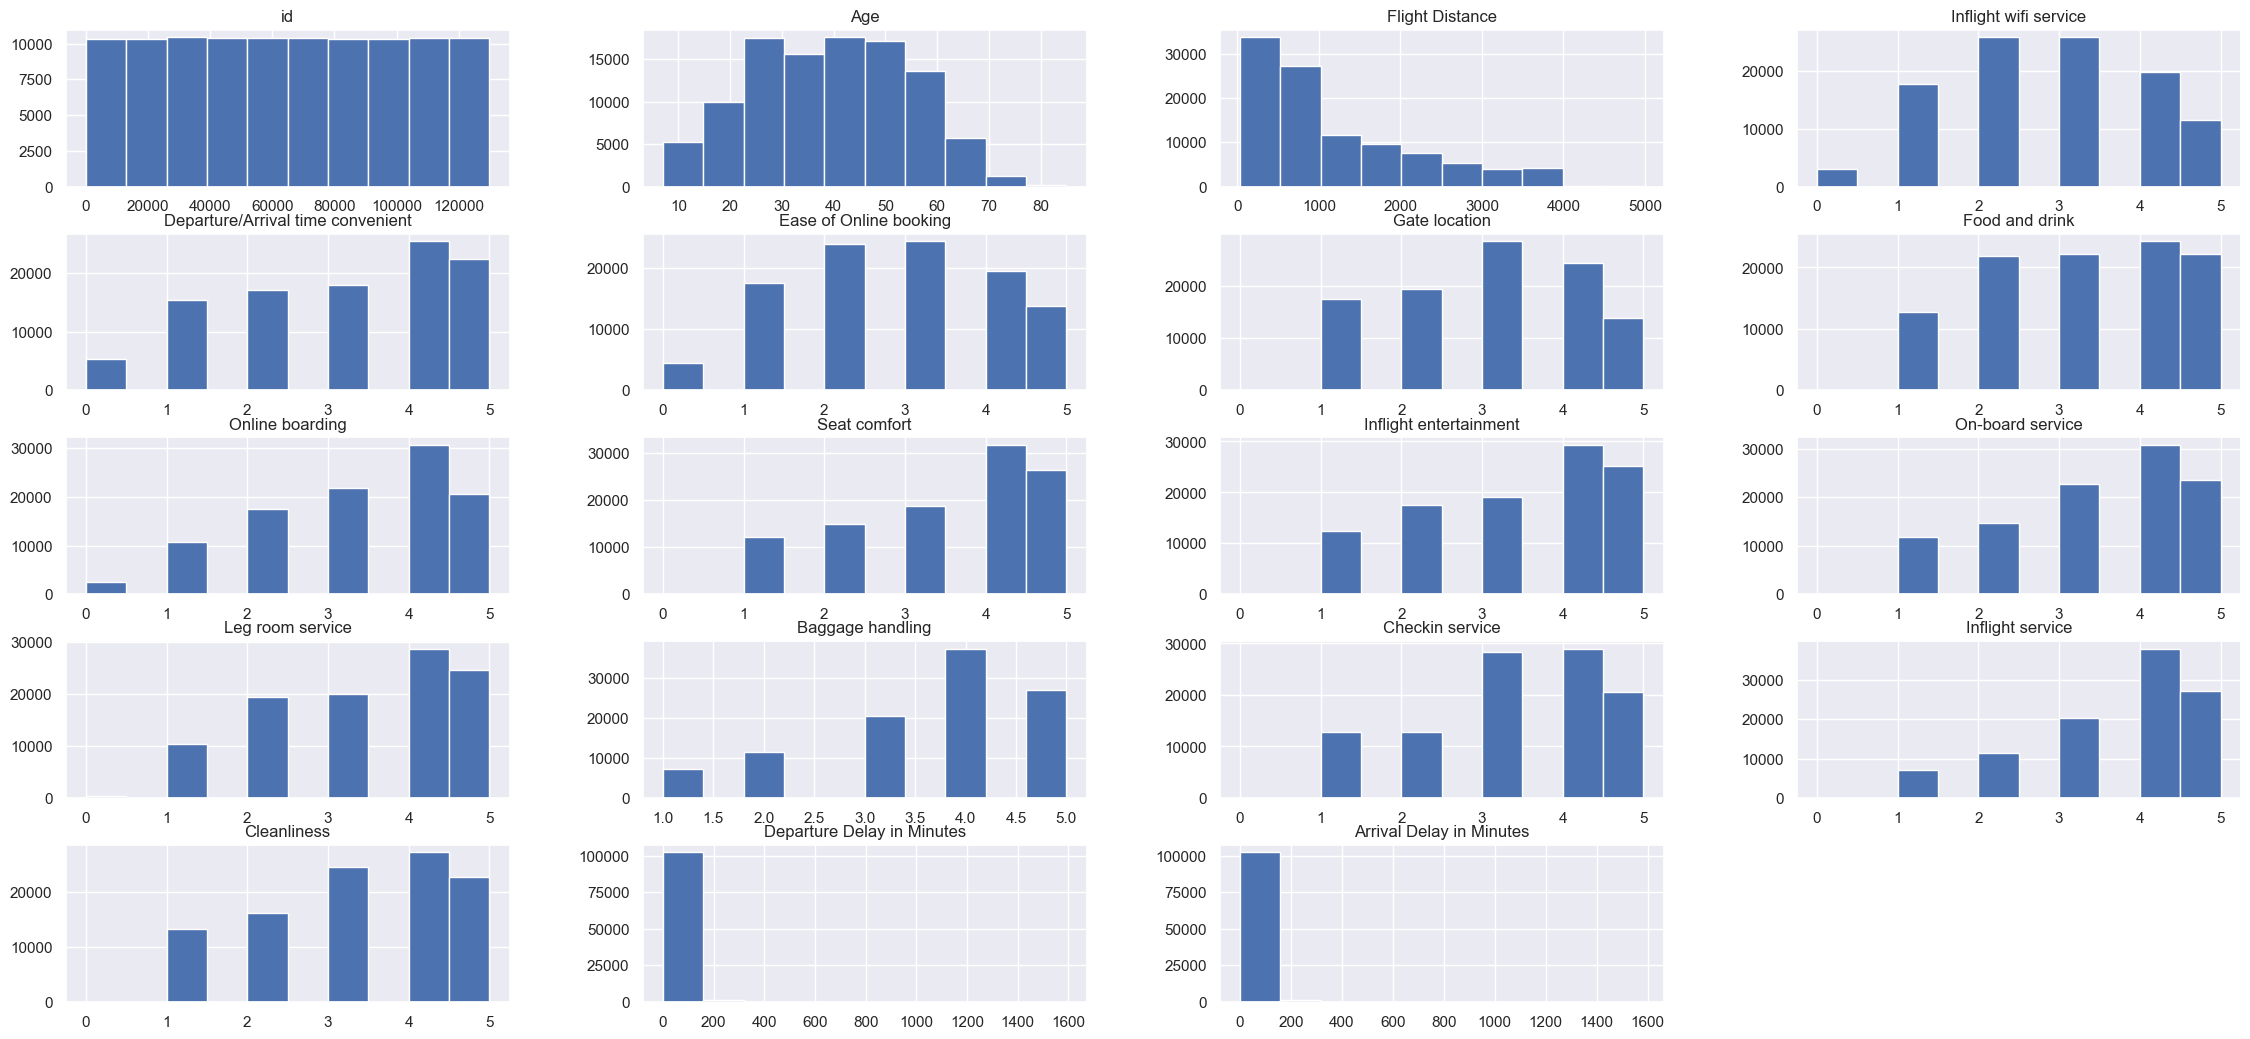

In [31]:
train.hist(figsize=(25,12))

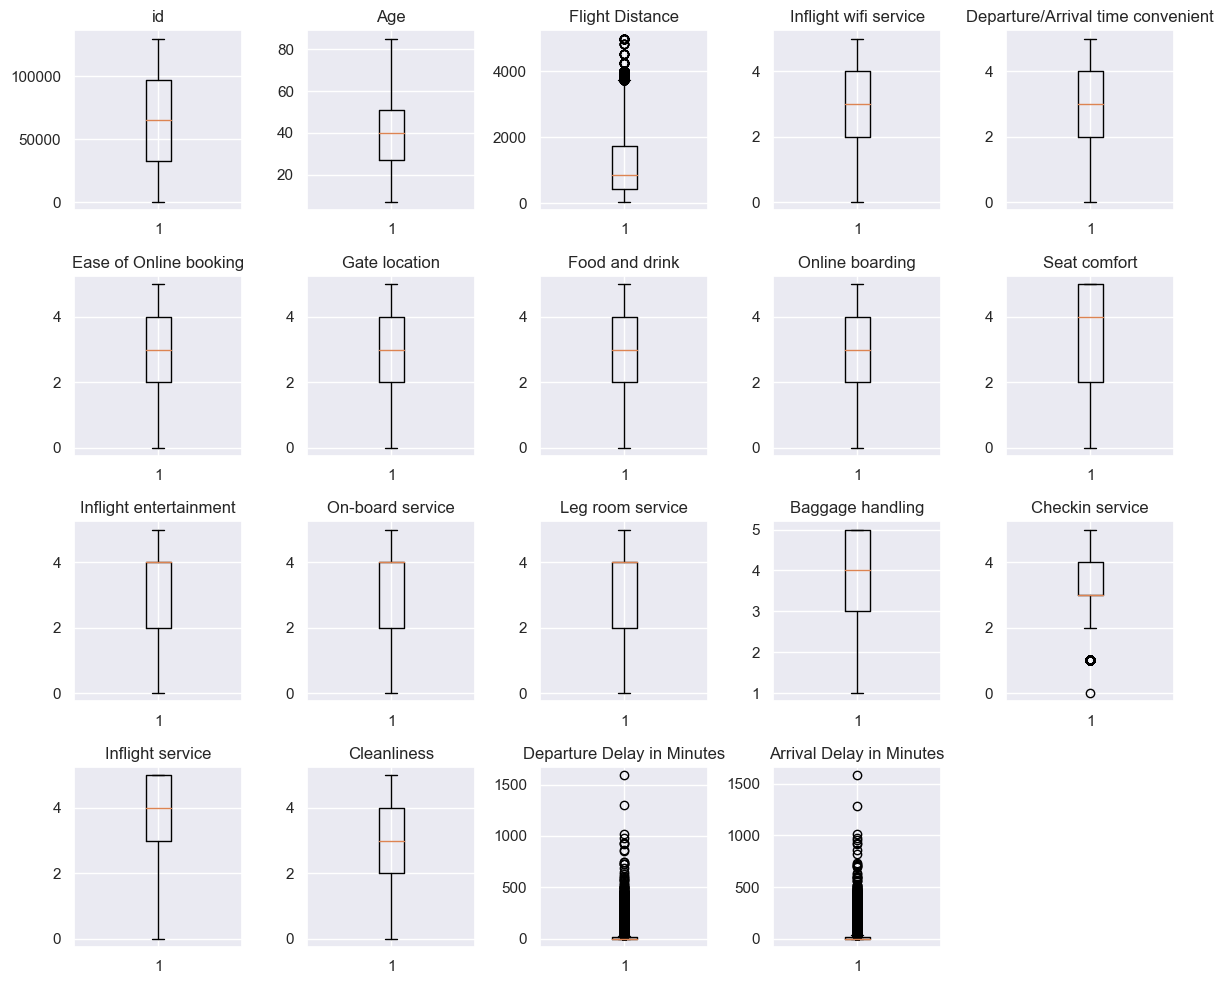

In [32]:
plt.figure(figsize=(12, 10))  

# Iterate over the numerical columns and create a box plot for each column
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)  
    plt.boxplot(train[column])
    plt.title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# As we see there are outliers in columns ='Flight Distance',Checkin service,
#'Departure Delay in Minutes', 'Arrival Delay in Minutes'

<AxesSubplot:xlabel='satisfaction'>

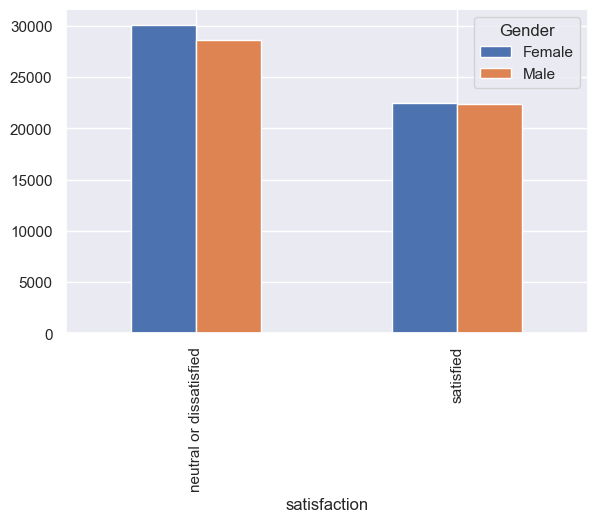

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
gender= pd.crosstab(train['satisfaction'],train['Gender']) # There is no significance of gender in customer satisfaction 
gender.plot.bar(ax=ax)

<AxesSubplot:xlabel='satisfaction'>

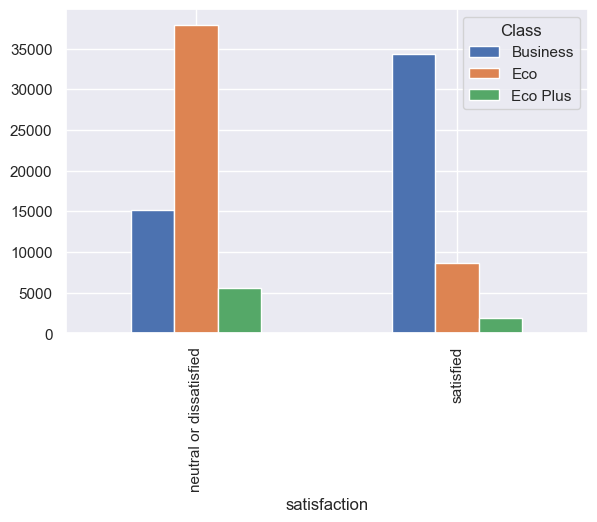

In [34]:
fig, ax = plt.subplots(figsize=(6, 4)) 

is_class= pd.crosstab(train['satisfaction'],train['Class']) 
is_class.plot.bar(ax=ax)

In [35]:
# Here we see that Business class is more satisfied  in other hand Eco class is dissatisfied or netural

In [36]:
catigorical_features


Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(train[feature])
    train[feature] = le.transform(train[feature])

In [38]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<AxesSubplot:>

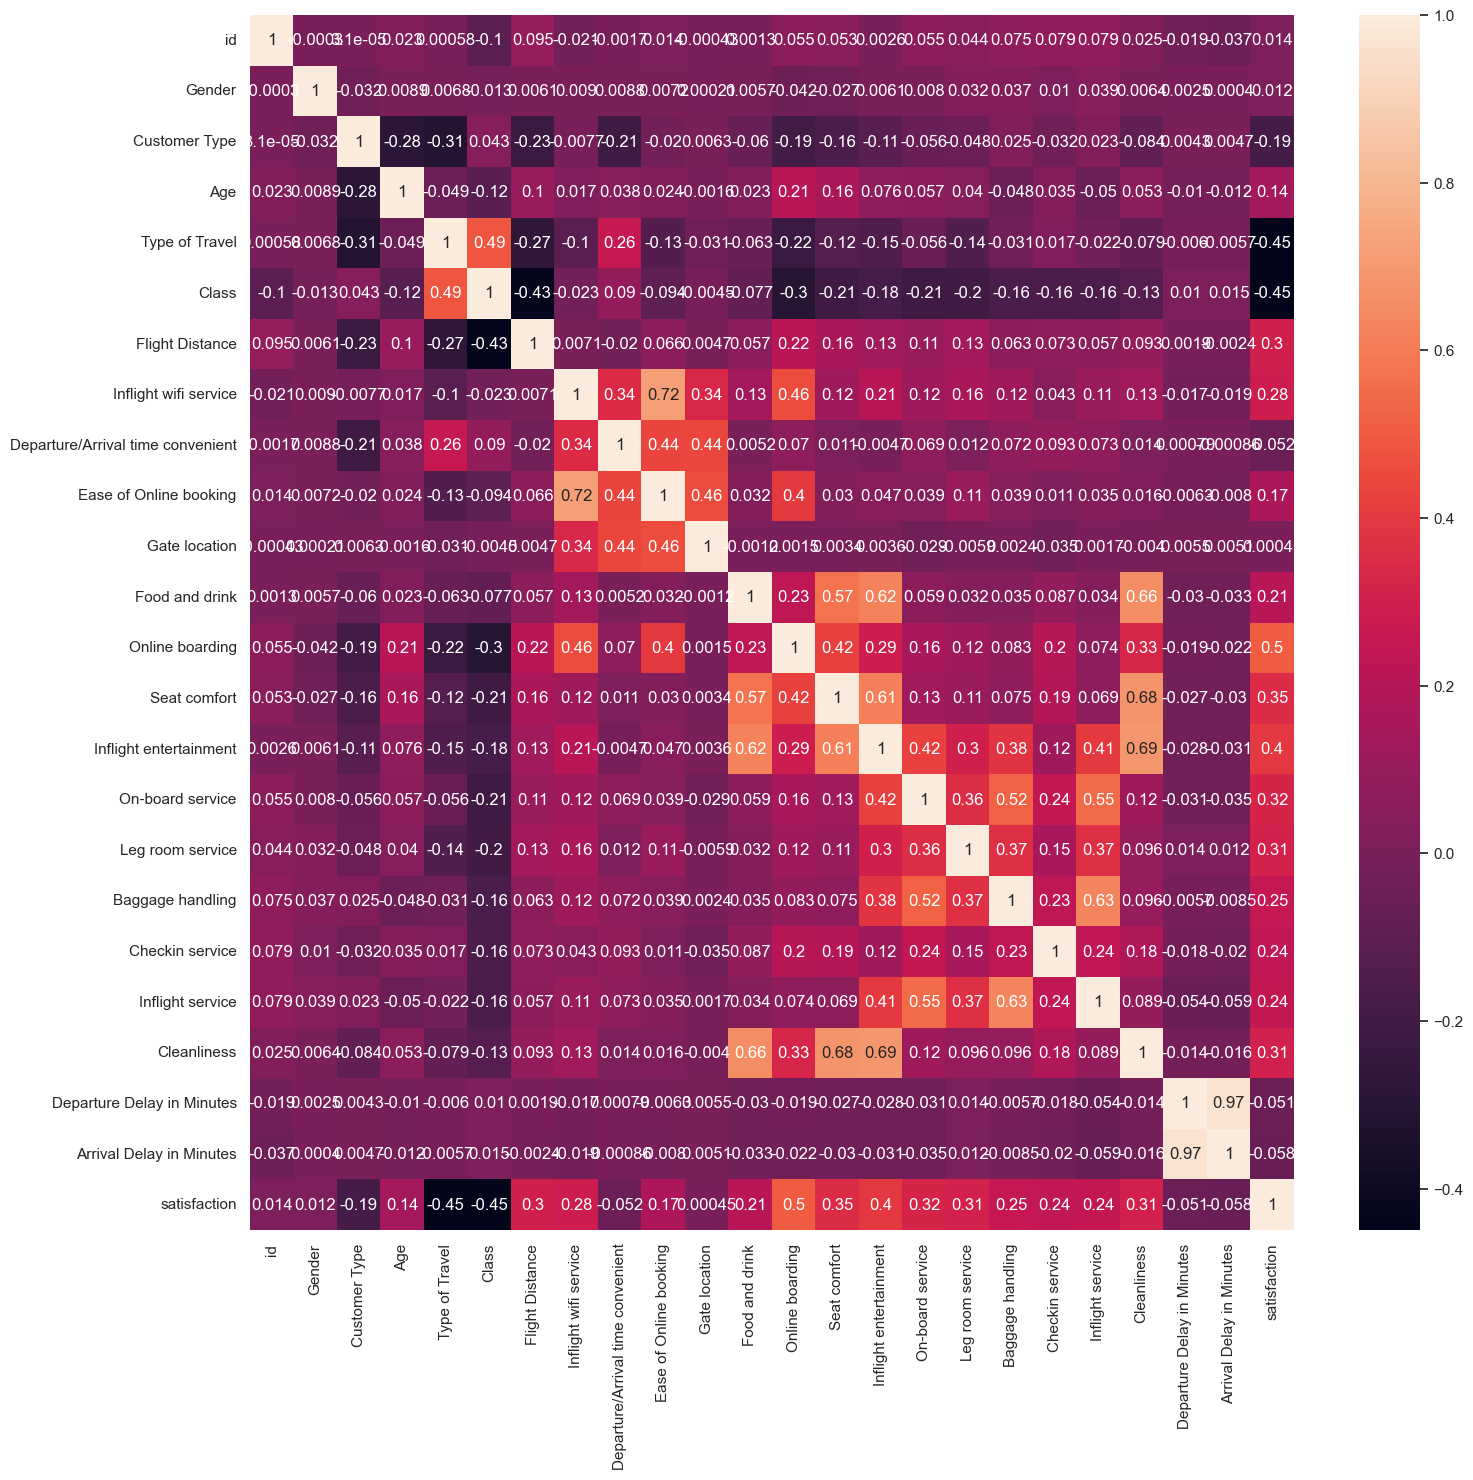

In [39]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(train.corr(), annot=True)

In [40]:
train.shape

(103594, 24)

In [41]:
# from above correlation Matrix we see that columns 'Id','Departure Delay in Minutes', 'Arrival Delay in Minutes'
#'Gate location' are not having much impact on data so we remove those columns

In [42]:
train.drop(['id','Departure Delay in Minutes', 'Arrival Delay in Minutes','Gate location'],axis=1,inplace=True)


In [43]:
train.shape

(103594, 20)

In [44]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

In [50]:
train.to_csv("train_cleandata.csv",index=False)


In [51]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(test[feature])
    test[feature] = le.transform(test[feature])

In [52]:
test.shape

(25893, 24)

In [53]:
test.drop(['id','Departure Delay in Minutes', 'Arrival Delay in Minutes','Gate location'],axis=1,inplace=True)


In [54]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,0,52,0,1,160,5,4,3,3,4,3,5,5,5,5,2,5,5,1
1,0,0,36,0,0,2863,1,1,3,5,4,5,4,4,4,4,3,4,5,1
2,1,1,20,0,1,192,2,0,2,2,2,2,2,4,1,3,2,2,2,0
3,1,0,44,0,0,3377,0,0,0,3,4,4,1,1,1,1,3,1,4,1
4,0,0,49,0,1,1182,2,3,4,4,1,2,2,2,2,2,4,2,4,1


In [55]:
test.shape

(25893, 20)

In [56]:
test.to_csv("test_cleandata.csv",index=False)

# Model Traning¶

In [57]:
# We can now generate our train_x, train_y, test_x, test_y numpy arrays for model training, fitting and validation purposes

In [58]:
from sklearn.model_selection import train_test_split

# Separate features and labels for train dataset
X_train = train.drop('satisfaction', axis=1)
y_train = train['satisfaction']

# Separate features and labels for test dataset
X_test = test.drop('satisfaction', axis=1)
y_test = test['satisfaction']




In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(103594, 19)
(25893, 19)
(103594,)
(25893,)


In [60]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

# Apply the scaler to your data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()



In [64]:
model.fit(X_train_scaled, y_train)  # Train the model


LogisticRegression()

In [66]:
y_pred = model.predict(X_test_scaled)   # Make predictions on the test data



In [67]:
accuracy = accuracy_score(y_test, y_pred)  # Evaluate the model
print("Accuracy:", accuracy)



Accuracy: 0.8700807167960453


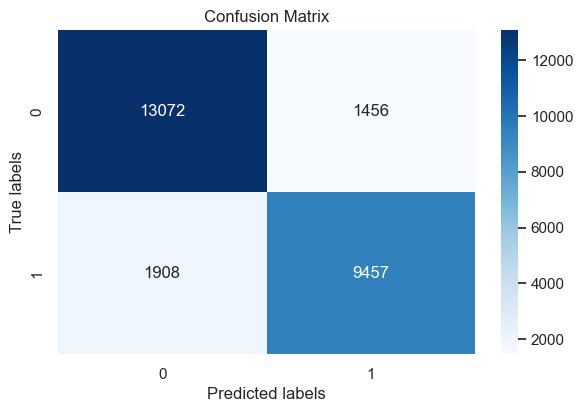

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_2 = RandomForestClassifier()


In [71]:
model_2.fit(X_train_scaled, y_train)

y_pred2 = model_2.predict(X_test_scaled)



In [72]:
# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy_2)


Accuracy: 0.9628857220098096


In [73]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



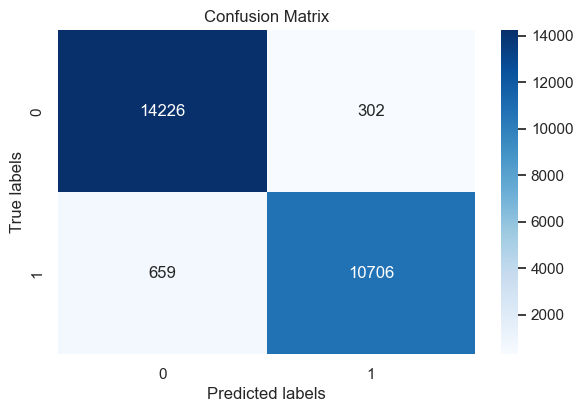

In [74]:
cm_2 = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [75]:
# Based on Accuracy and F1_ Score we will select RandomForestClassifier for production

In [76]:
import pickle

# Train the model
model.fit(X_train_scaled, y_train)

# Pickle the model
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [77]:
import pickle

# Train the model
model_2.fit(X_train_scaled, y_train)

# Pickle the model
filename = 'model_2.pkl'
pickle.dump(model_2, open(filename, 'wb'))
